In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
df=df[['AveragePrice', 'type','region']]
df=df[(df['region']=="Orlando")|(df['region']=='Boston')|(df['region']=='Chicago')]

In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1014 non-null   float64
 1   type          1014 non-null   object 
 2   region        1014 non-null   object 
dtypes: float64(1), object(2)
memory usage: 23.9+ KB


- 정규분포, 등분산 검정

- 분산분석 수행

In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula='AveragePrice~C(type)+C(region)+C(type):C(region)'
model=ols(formula, df).fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


교호작용에 대한 p는 0.05보다 작으므로 귀무가설을 기각한다. 즉 교호작용이 있다.

각각의 X형 변수는 p-value가 0.05보다 작으므로 기각한다. type별에 따른 AveragePrice 평균 간 유의미한 차이가 존재한다.

region에 따른 AveragePrice 평균 간 유의미한 차이가 존재한다.

- 교호작용 확인

In [6]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

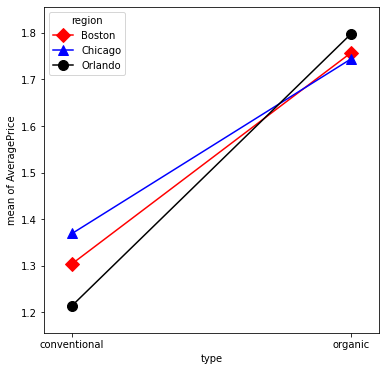

In [7]:
x1=df['type']
x2=df['region']
y=df['AveragePrice']
fig,ax=plt.subplots(figsize=(6,6))
fig=interaction_plot(x1, x2, y, colors=['red', 'blue','black'], markers=['D', '^','o'], ms=10, ax=ax)

선이 교차하고 있으므로 상호작용이 존재한다고 할 수 있다.

### 등분산 검정

회사의 제품의 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속 함유량이 차이가 난다고 제보를 받았다. 해당 금속 함유량 데이터에 대한 검정을 수행하시오.(유의확률 : 0.05)

(1) 귀무가설 대립가설을 설정하시오

H0 : 금속 재질 함유량의 분산은 1.3이다.(제품별 차이는 없다.)

H1 : 금속 재질 함유량의 분산은 1.3이 아니다.(제품별 차이가 있다.)

In [8]:
import pandas as pd
import numpy as np
df=pd.read_csv('metalicity')
df

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


In [9]:
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(df.metalicity)

ShapiroResult(statistic=0.9822468757629395, pvalue=0.05002119019627571)

귀무가설을 기각할 수 없다. 즉 정규성을 따른다.

In [10]:
s_mean=df.metalicity.mean()
u_var=df.metalicity.var(ddof=1)
n=len(df.metalicity)
s_mean, u_var

(45.26662991017956, 0.7432009850287773)

- 검정통계량

In [11]:
V=(n-1)*u_var/1.3
V

85.182266745606

- 채택

In [12]:
rv=stats.chi2(df=n-1)
rv.cdf(V), (1-rv.cdf(V))

(6.066103822435281e-06, 0.9999939338961775)

In [13]:
#p값
rv.cdf(V)**2

3.679761558456392e-11

In [15]:
#기각역
alpha=0.05
rv.interval(1-alpha)

(117.09798286232113, 184.68695493443445)

p값이 0.05보다 작으므로 귀무가설을 기각한다. 

금속 재질 함유량의 분산은 1.3이 아니다.(제품별 차이가 있다.)

- 신뢰구간

In [16]:
alpha=0.05
lcl=(n-1)*u_var/rv.isf(alpha/2)
ucl=(n-1)*u_var/rv.isf(1-alpha/2)
lcl, ucl

(0.5995926827024705, 0.9456776629490504)

### Run-test

- H0 : 관측값이 임의적이다
- H1 : 관측값이 임의적이지 않다

In [17]:
import pandas as pd
data=pd.DataFrame({'product':['a','a','b', 'b', 'a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']})
a=9
b=11
data

,product
0,a
1,a
2,b
3,b
4,a
5,a
6,a
7,a
8,b
9,b


In [18]:
data.loc[data['product']=='a', 'product']=1
data.loc[data['product']=='b', 'product']=0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [20]:
from statsmodels.sandbox.stats.runs import runstest_1samp
검정통계량, p=runstest_1samp(data['product'])

In [21]:
round(검정통계량,3)

-1.114

In [22]:
p

0.26506984027306035

p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 관측값이 임의적이 아니다. 연관이 있다.

### 검정
공장에서는 시제품의 농도가 60%라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

(1) 연구가설, 귀무가설을 작성하시오.
- H0 : 시제품의 농도는 60%이다.
- H1 : 시제품의 농도는 60%가 아니다.

(2) 유효한 샘플의 수를 계산하시오.

10개의 샘플은 비모수검정으로 윌콕슨의 부호순위 검정을 진행한다.

In [23]:
df=pd.DataFrame({'data':[52, 50, 62, 75, 26, 45, 62, 35, 57, 14]})
df

,data
0,52
1,50
2,62
3,75
4,26
5,45
6,62
7,35
8,57
9,14


In [24]:
df['data'].median()

51.0

In [25]:
from collections import Counter
Counter(df.data)

Counter({52: 1, 50: 1, 62: 2, 75: 1, 26: 1, 45: 1, 35: 1, 57: 1, 14: 1})

제거할 것이 없다. 유효한 샘플수는 

In [26]:
len(df.data)

10

In [27]:
shapiro(df.data)

ShapiroResult(statistic=0.965764582157135, pvalue=0.849041759967804)

In [28]:
stats.wilcoxon(df.data-60, alternative='two-sided')

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

귀무가설을 기각할 수 없다. 즉 시제품 농도는 60%이다.

### 시계열데이터->덴드로그램

코로나 시계열 데이터로 다음을 수행하시오

(1) ACF를 사용해서 distance를 계산하시오.

(2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

In [29]:
import pandas as pd
df=pd.read_csv("서울특별시 코로나19.csv")
df=df.iloc[:, 1:]
df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,37261,33753,55376,81018,96008,95433,103288,116862,75118,82254,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,36216,32835,53872,79030,93474,92993,100255,113609,72934,79677,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,35276,31878,52391,76802,91030,90277,97419,110583,70754,77878,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,34879,31577,51652,76108,89876,89302,96359,109500,70003,76542,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,34061,30903,50720,74178,87770,87345,93690,106437,68329,75119,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,3,0,0,0,0,0,1,2,0,0,...,1,0,0,0,0,0,0,0,1,0


In [33]:
import numpy as np
import statsmodels.api as sm #ACF distance
from statsmodels.tsa.arima_process import ArmaProcess #ARMA

#warinng 무시
import warnings
warnings.filterwarnings('ignore')

def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags)

n_lags=785 #데이터개수
lag_arr=np.repeat(n_lags, df.shape[1]) #df.shape[1] : 컬럼개수

acf_list=list(map(acf, df.transpose().to_numpy(), lag_arr)) #한번 transpose, acf 계산
acf_df=pd.DataFrame(acf_list).transpose() #원상복귀
acf_df.columns=df.columns

acf_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.017175,-0.017212,-0.017232,-0.015171,-0.015231,-0.016054,-0.016019,-0.015739,-0.015857,-0.015638,...,-0.015340,-0.016170,-0.015477,-0.016447,-0.016157,-0.016273,-0.016151,-0.016955,-0.015392,-0.015228
781,-0.013889,-0.013915,-0.013929,-0.012270,-0.012320,-0.012982,-0.012970,-0.012738,-0.012831,-0.012644,...,-0.012420,-0.013083,-0.012523,-0.013303,-0.013069,-0.013163,-0.013059,-0.013717,-0.012449,-0.012334
782,-0.010519,-0.010542,-0.010562,-0.009290,-0.009335,-0.009836,-0.009829,-0.009646,-0.009726,-0.009589,...,-0.009417,-0.009909,-0.009490,-0.010075,-0.009899,-0.009972,-0.009907,-0.010415,-0.009434,-0.009360
783,-0.007108,-0.007135,-0.007144,-0.006282,-0.006309,-0.006655,-0.006652,-0.006522,-0.006586,-0.006479,...,-0.006374,-0.006704,-0.006427,-0.006808,-0.006687,-0.006742,-0.006686,-0.007044,-0.006380,-0.006323


In [34]:
#계층적 군집분석 형태를 맞추기 위해 acf_df를 transpose
acf_df=acf_df.T

In [35]:
import scipy.cluster.hierarchy as sch #계층적 군집분석 수행
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#폰트설정
font_path="C:/Windows/Fonts/gulim.ttc"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#warinng 무시
import warnings
warnings.filterwarnings('ignore')

- 덴드로그램

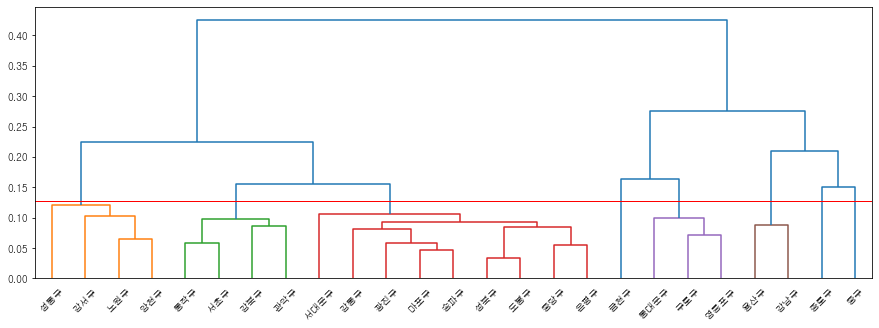

In [36]:
plt.figure(figsize=(15,5))

#acf_df의 지역 인덱스를 label에 담음
label=acf_df.index

#계층적 군집분석 수행
dend1=sch.linkage(acf_df, method='average')

#임곗값 설정
cutoff=0.3*max(dend1[:,2])

#덴드로그램
dend_res1=sch.dendrogram(dend1, color_threshold=cutoff, labels=label)
plt.axhline(y=cutoff, color='r', linewidth=1)
plt.show()